# Project Name: House price prediction using linear regression

# 1: Basic Data Exploration 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the 'Raw_Housing_Prices.csv' file in pandas dataframe.

In [37]:
data = pd.read_csv(r"D:\House Price Prediction\Raw_Housing_Prices.csv")

In [38]:
data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [39]:
data.tail(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287
21612,1523300157,14 October 2017,325000.0,2,0.75,1020.0,1076.0,2.0,No,None,...,7,1020.0,0,10,0,98144.0,47.5941,-122.299,1020.0,1357


## Find out the number of rows and columns

In [40]:
data.shape

(21613, 21)

## Eyeballing data types of features

In [41]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

# 2. Descriptives statistics of the Dataset

In [42]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
data.describe(include='all')

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,21613,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


### mean()

In [44]:
data['Sale Price'].mean()

540198.4357443658

### min()

In [45]:
data['Sale Price'].min()

75000.0

### max()

In [46]:
data['Sale Price'].max()

7700000.0

### pandas std()

In [47]:
data['Sale Price'].std()

367388.99446065375

### numpy std()

In [48]:
np.std(data['Sale Price'])

367380.4935294451

In [49]:
#small difference in between pandas std() function and np.std() fuction.
data['Sale Price'].std() - np.std(data['Sale Price'])

8.500931208662223

In [50]:
np.std(data['Sale Price'], ddof = 1)

367388.99446065375

### quantile()

In [51]:
data['Sale Price'].quantile(.25)

321950.0

In [52]:
data['Sale Price'].quantile(.50)

450000.0

In [53]:
data['Sale Price'].quantile(.75)

645000.0

# Numerical Variables

In [54]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

data[numerical_features].head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Datetime Variables

In [55]:
# Relation between Age of House and sale Price

In [56]:
# list of Datetime variables
year_features = [feature for feature in data.columns if 'Yr' in feature or 'Year' in feature or 'Date' in feature]

data[year_features].head()

,Date House was Sold,Age of House (in Years),Renovated Year
0,14 October 2017,63,0
1,14 December 2017,67,1991
2,15 February 2016,85,0
3,14 December 2017,53,0
4,15 February 2016,31,0


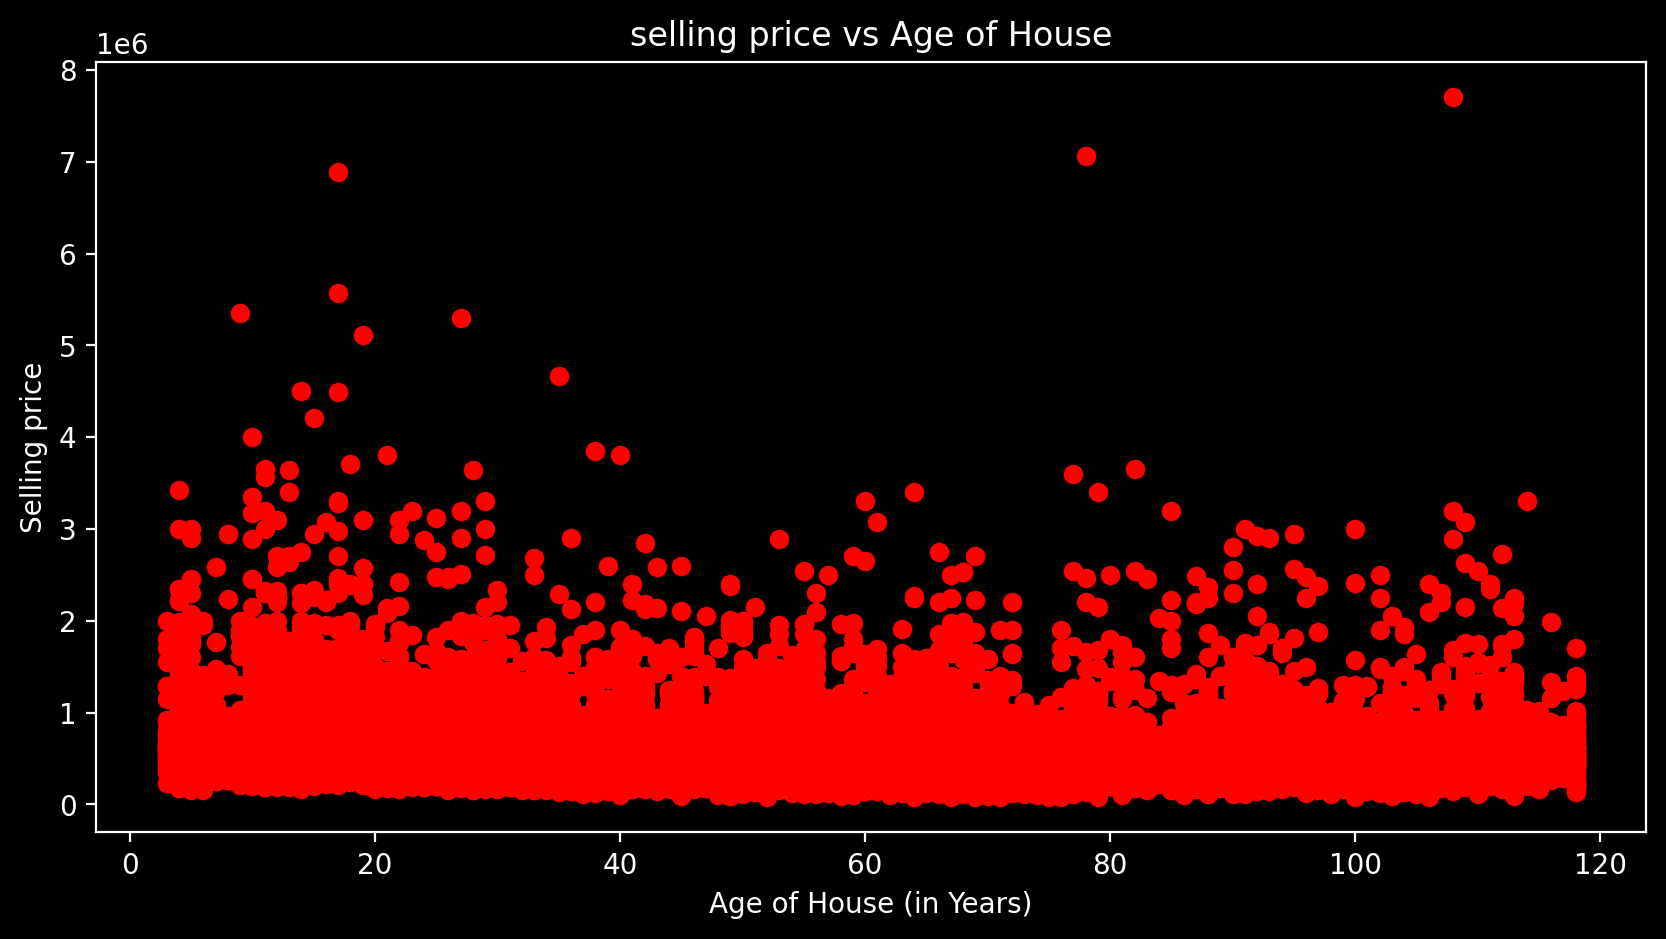

In [57]:
plt.style.use('default')
plt.style.use('dark_background')
plt.figure(figsize=(10,5), dpi = 200)
plt.scatter(
    data['Age of House (in Years)'],
    data['Sale Price'],
    color="red"
)

plt.xlabel("Age of House (in Years)")
plt.ylabel("Selling price")
plt.title("selling price vs Age of House")
plt.show()

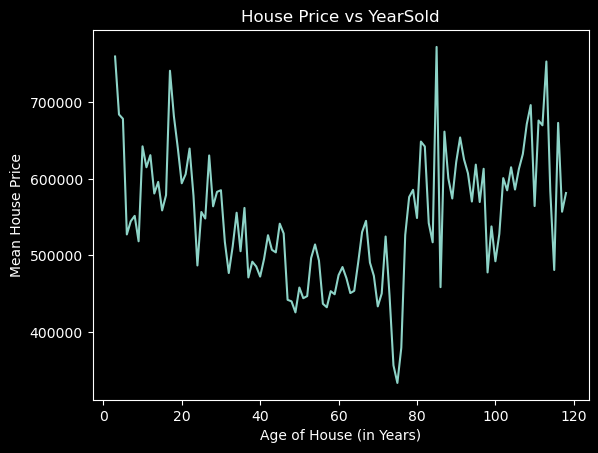

In [58]:
data.groupby('Age of House (in Years)')['Sale Price'].mean().plot()
plt.xlabel('Age of House (in Years)')
plt.ylabel('Mean House Price')
plt.title("House Price vs YearSold")
plt.show()

In [59]:
data['No of Bathrooms'] = data['No of Bathrooms'].round()
data['No of Bathrooms']

0        1.0
1        2.0
2        1.0
3        3.0
4        2.0
        ... 
21608    2.0
21609    2.0
21610    1.0
21611    2.0
21612    1.0
Name: No of Bathrooms, Length: 21613, dtype: float64

# Numerical Discrete Variables

In [60]:
# list of Discrete numerical variables
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_features+['ID']]

data[discrete_features].head()

,No of Bedrooms,No of Bathrooms,No of Floors,Overall Grade
0,3,1.0,1.0,7
1,3,2.0,2.0,7
2,2,1.0,1.0,6
3,4,3.0,1.0,7
4,3,2.0,1.0,8


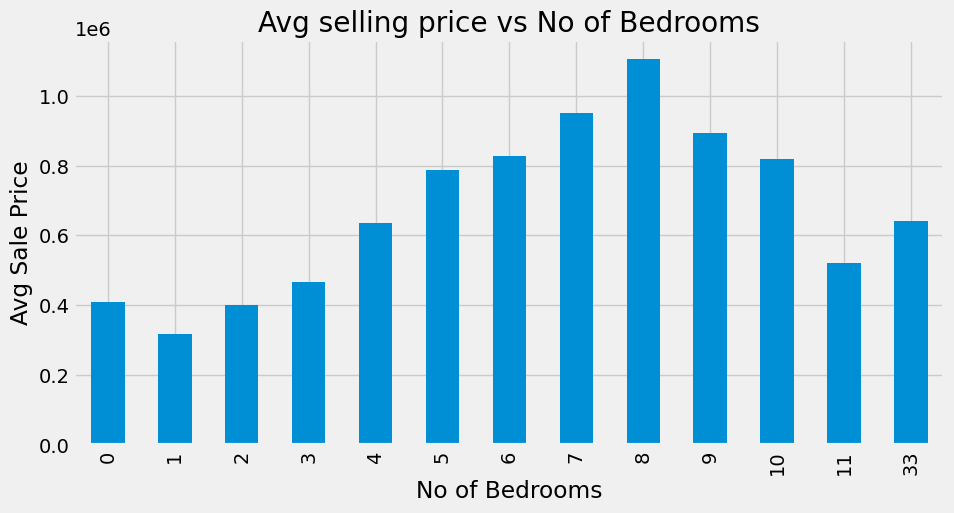

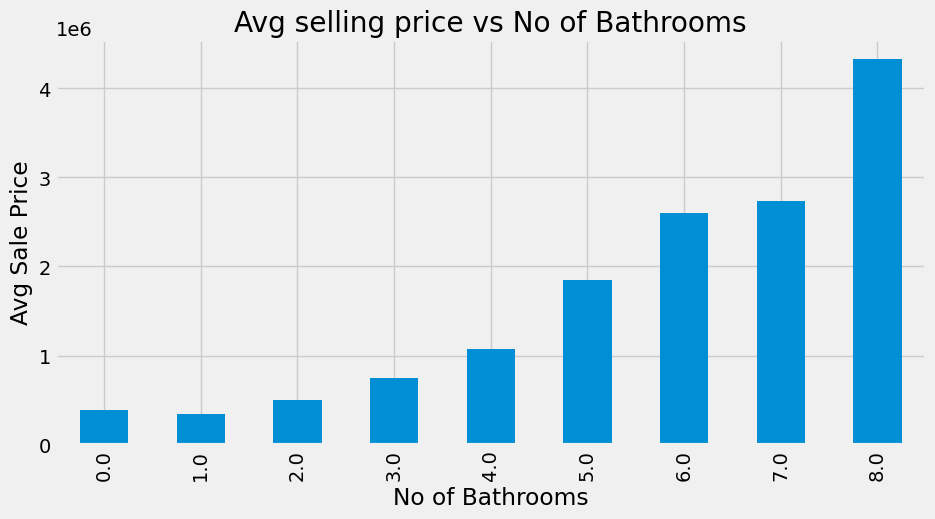

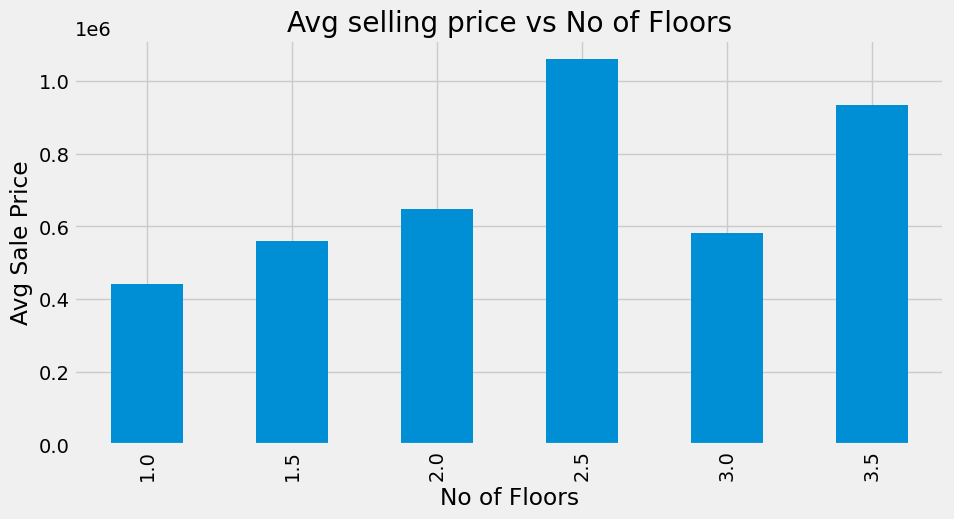

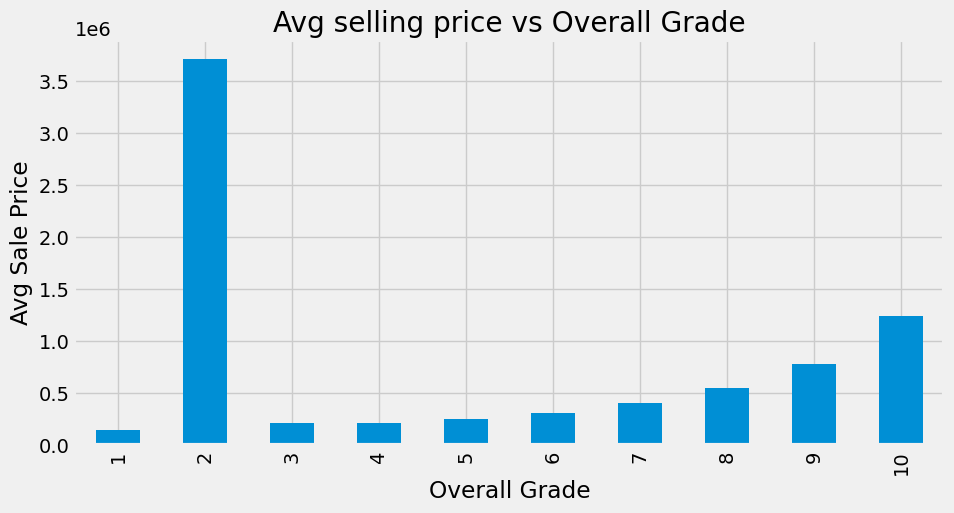

In [61]:
## Realtionship between discrete_features and Sale PRice

plt.style.use('default')
plt.style.use('fivethirtyeight')
for feature in discrete_features:
    plt.figure(figsize=(10,5))
    data.groupby(feature)['Sale Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg Sale Price')
    plt.title(f"Avg selling price vs {feature}")
    plt.show()

# Numerical Continuous Variable

In [62]:
# list of Continuous numerical variables
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+year_features+['ID']+['Zipcode']]

data[continuous_features]

,Sale Price,Flat Area (in Sqft),Lot Area (in Sqft),Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,1180.0,5650.0,1180.0,0,47.5112,-122.257,1340.0,5650
1,538000.0,2570.0,7242.0,2170.0,400,47.7210,-122.319,1690.0,7639
2,180000.0,770.0,10000.0,770.0,0,47.7379,-122.233,2720.0,8062
3,604000.0,1960.0,5000.0,1050.0,910,47.5208,-122.393,1360.0,5000
4,510000.0,1680.0,8080.0,1680.0,0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530.0,1131.0,1530.0,0,47.6993,-122.346,1530.0,1509
21609,400000.0,2310.0,5813.0,2310.0,0,47.5107,-122.362,1830.0,7200
21610,402101.0,1020.0,1350.0,1020.0,0,47.5944,-122.299,1020.0,2007
21611,400000.0,1600.0,2388.0,1600.0,0,47.5345,-122.069,1410.0,1287


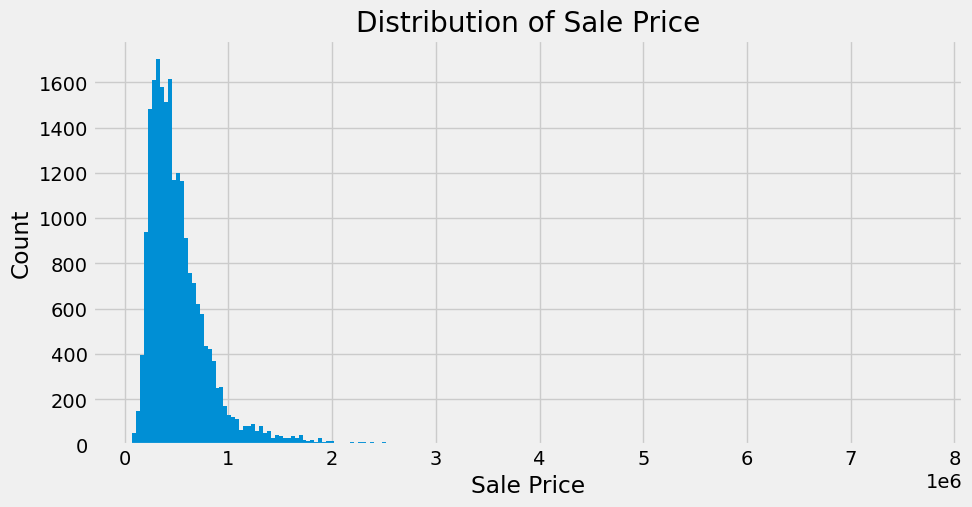

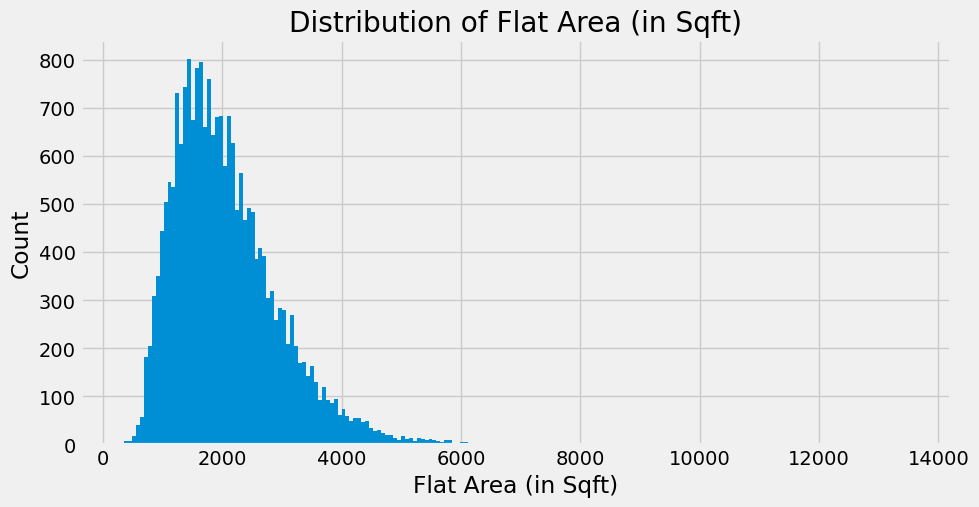

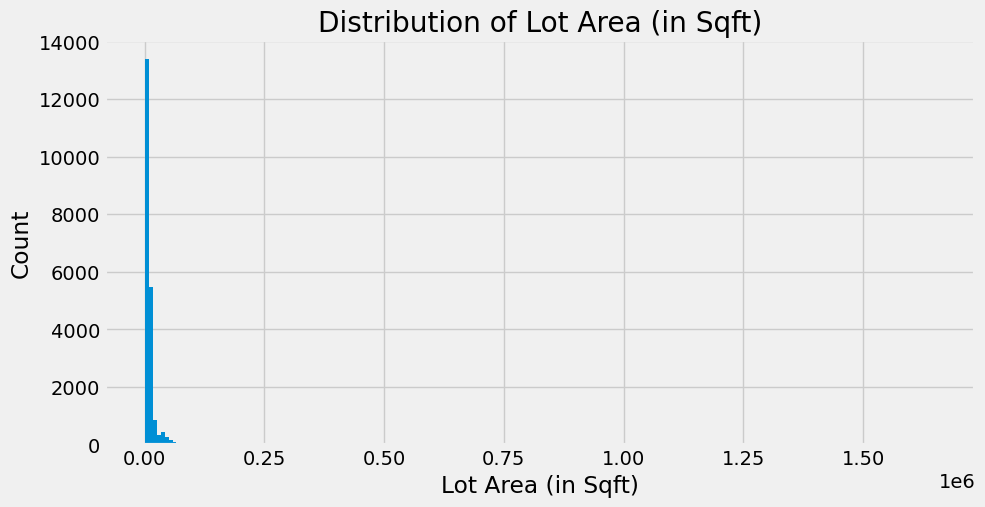

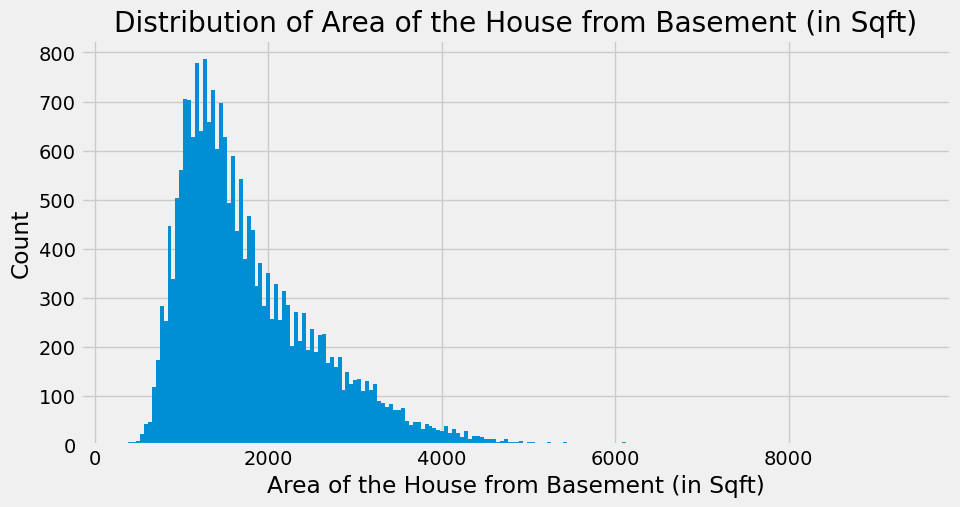

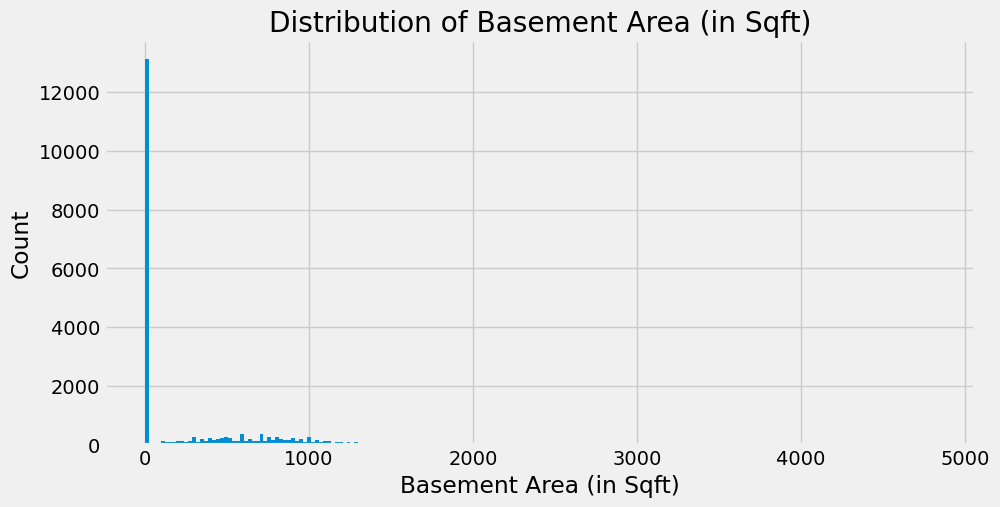

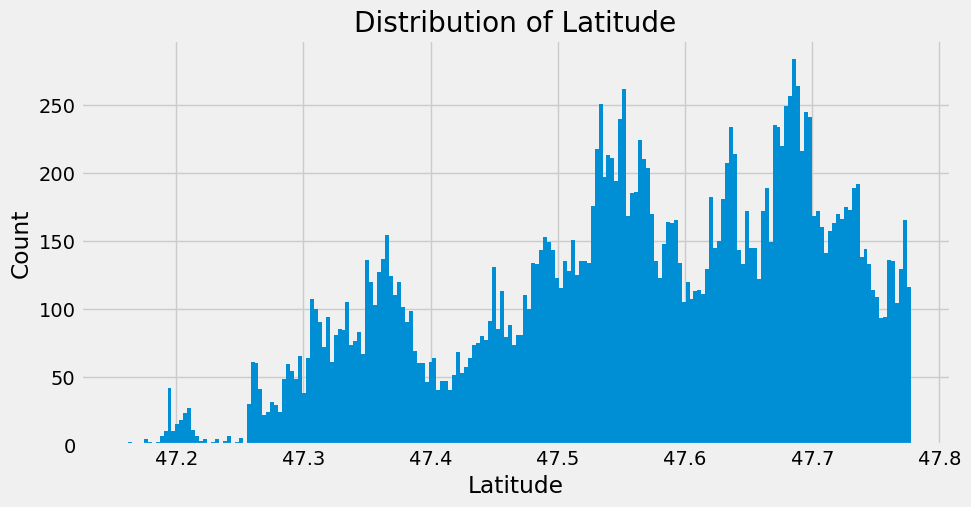

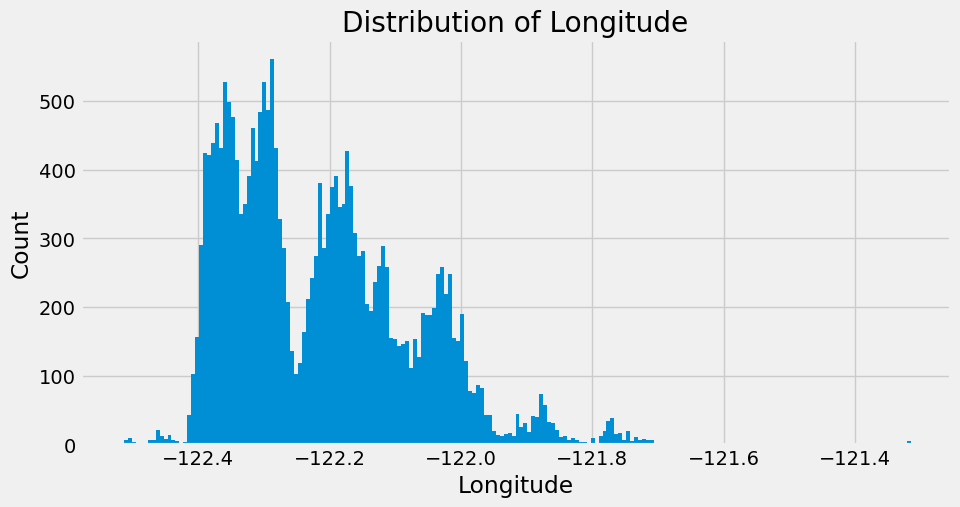

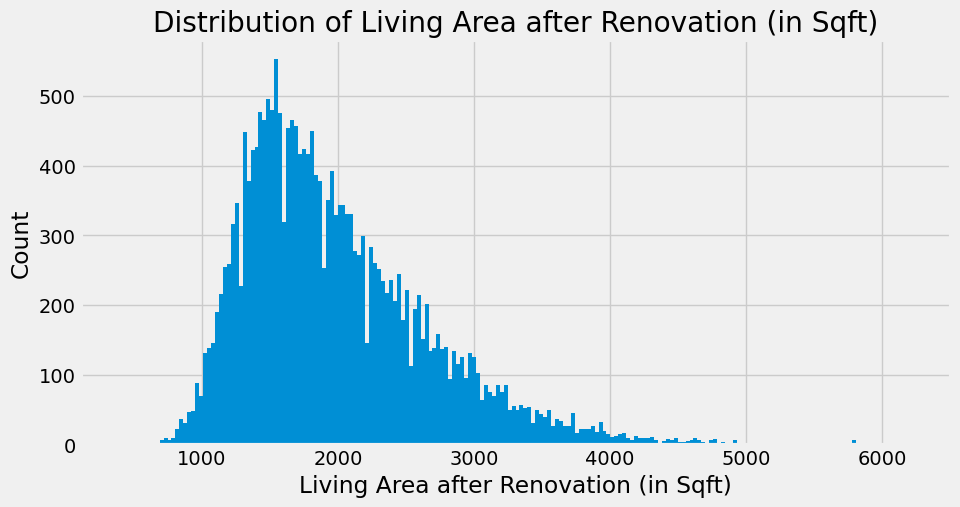

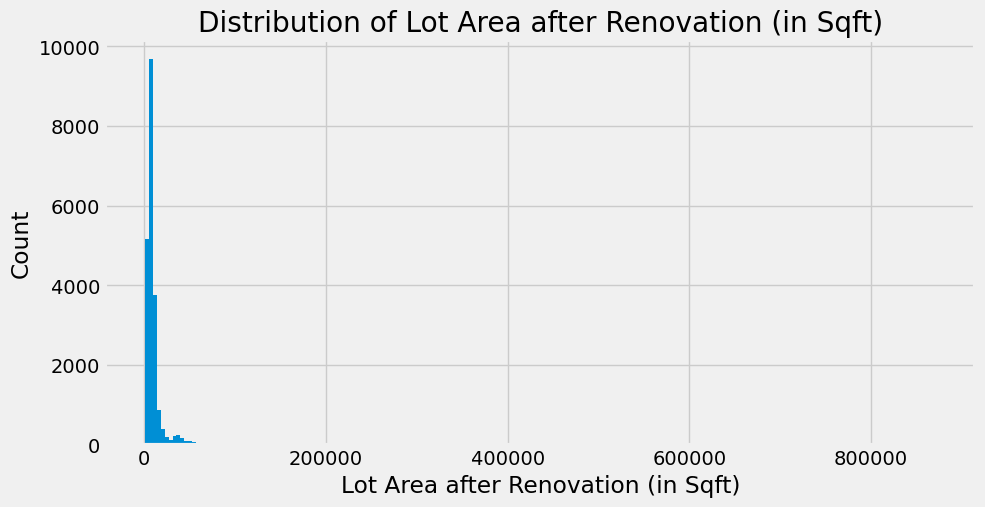

In [63]:
## Creating histograms to understand the distribution of continuous features

plt.style.use('default')
plt.style.use('fivethirtyeight')
for feature in continuous_features:
    plt.figure(figsize=(10,5))
    data[feature].hist(bins=200)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.show()

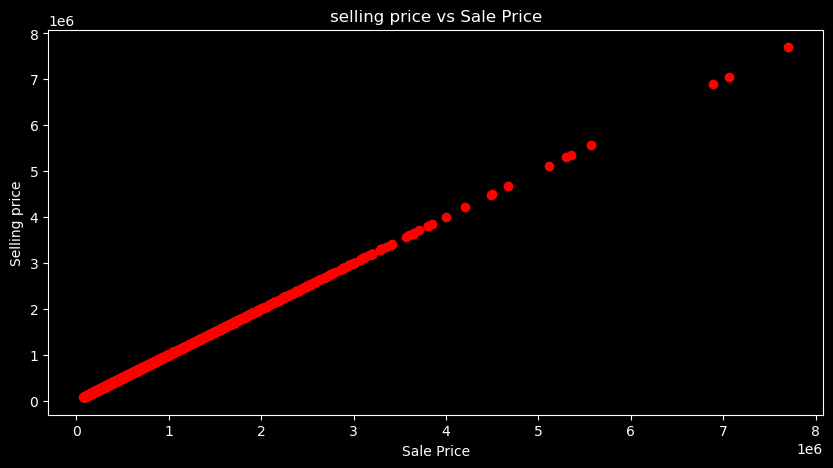

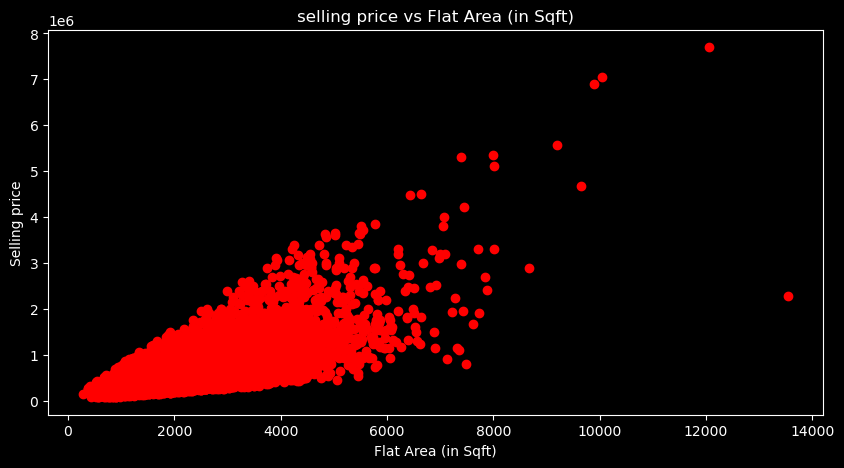

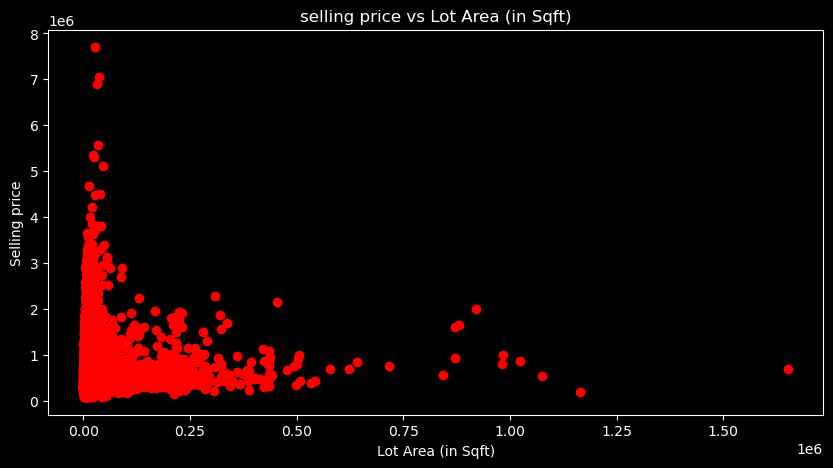

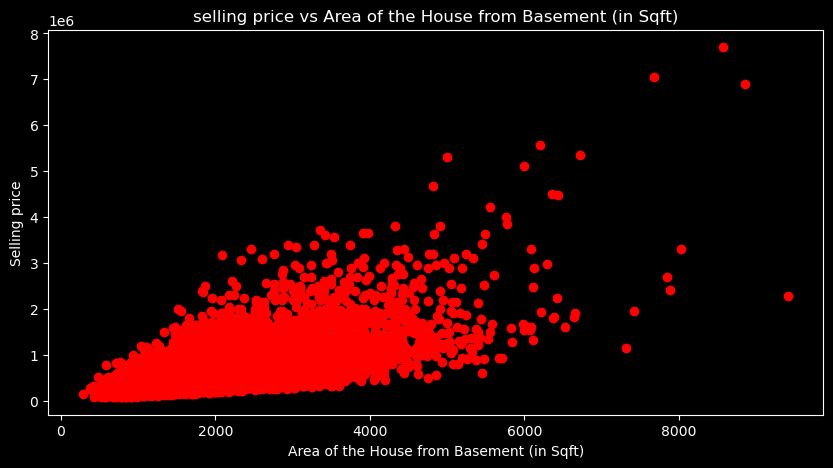

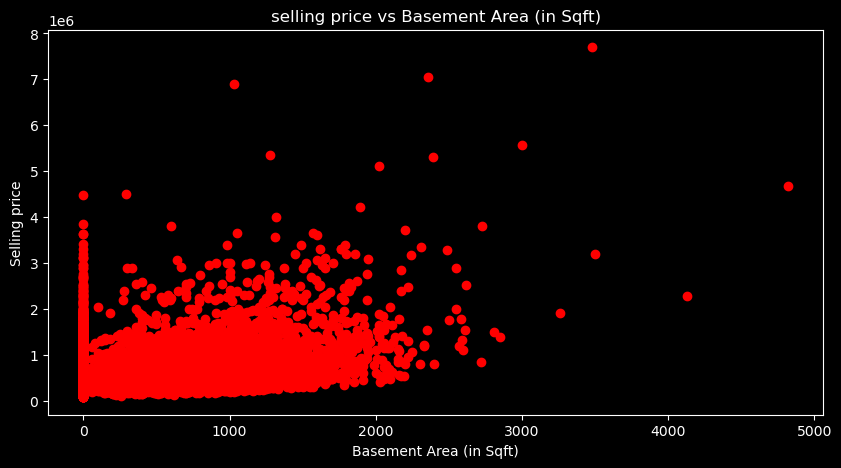

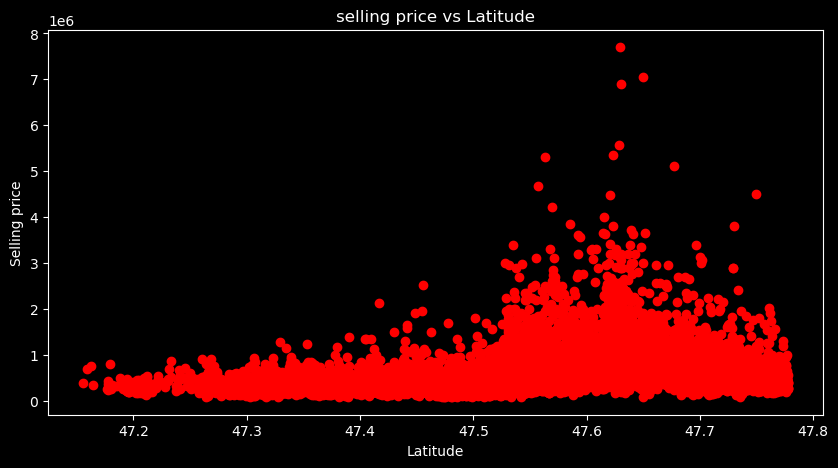

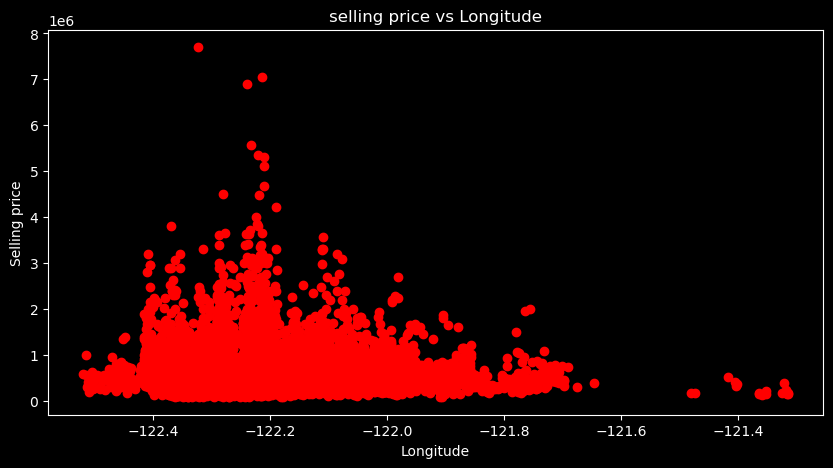

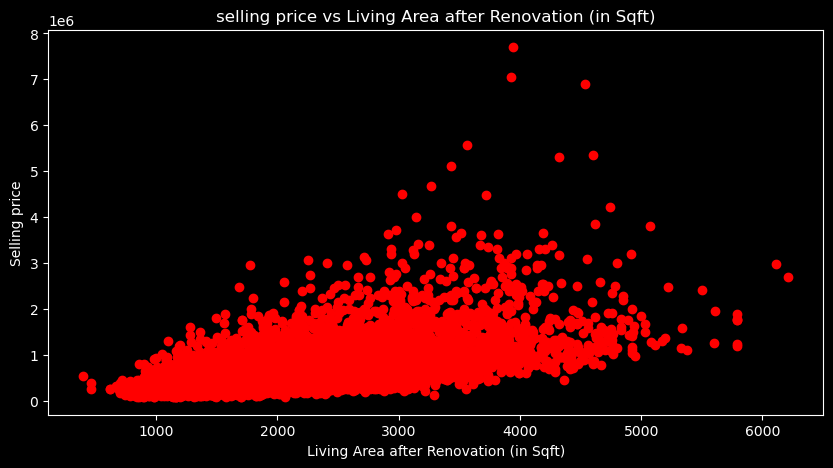

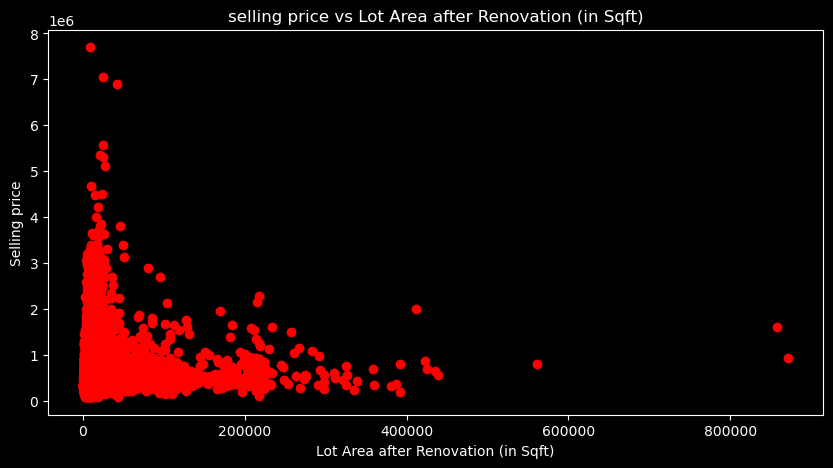

In [64]:
## we will analyse the relationship between Sale Price and continuous features

plt.style.use('default')
plt.style.use('dark_background')
for feature in continuous_features:
    plt.figure(figsize=(10,5))
    plt.scatter(
    data[feature],
    data['Sale Price'],
    color="red"
    )

    plt.xlabel(feature)
    plt.ylabel("Selling price")
    plt.title(f"selling price vs {feature}")
    plt.show()

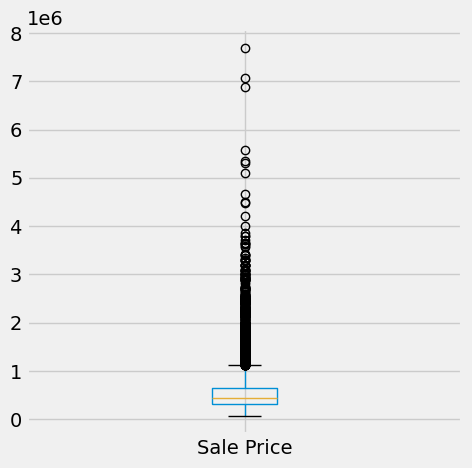

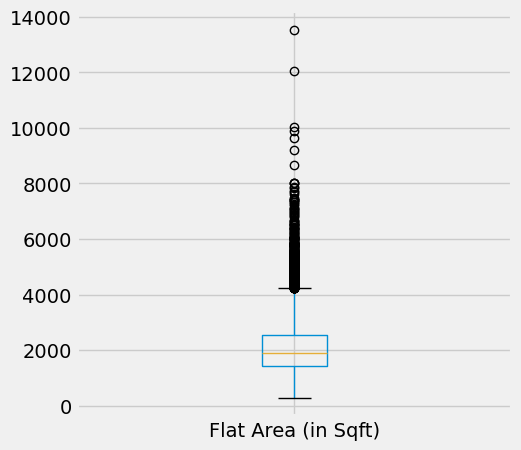

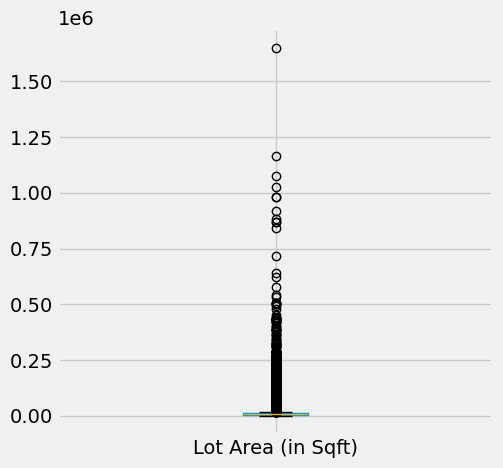

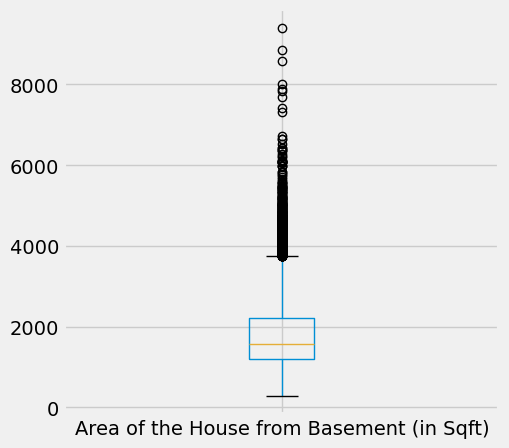

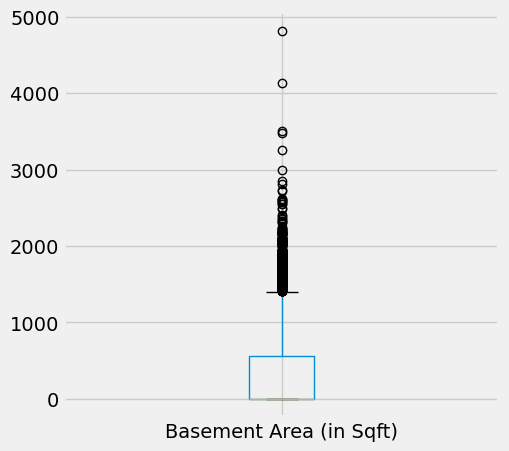

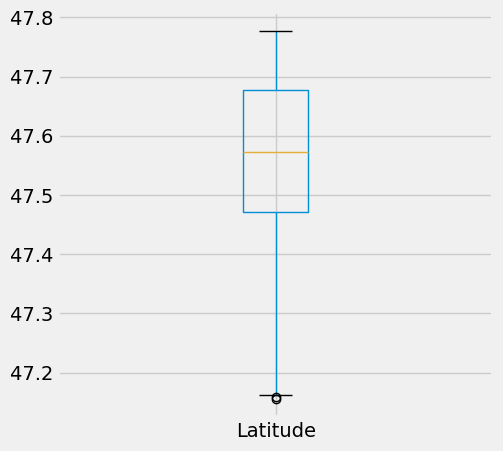

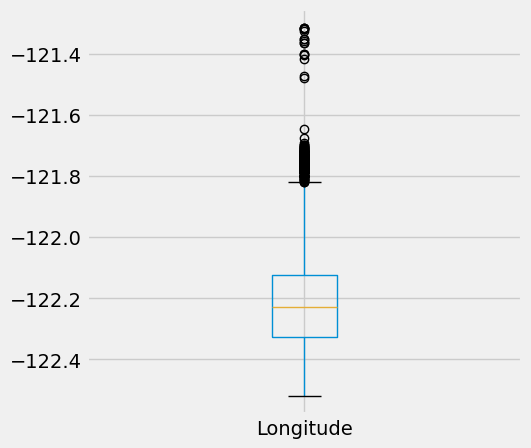

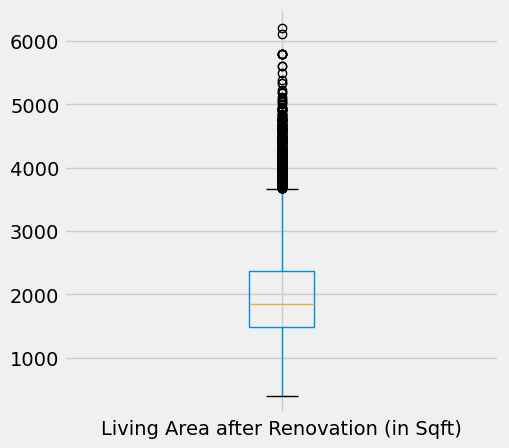

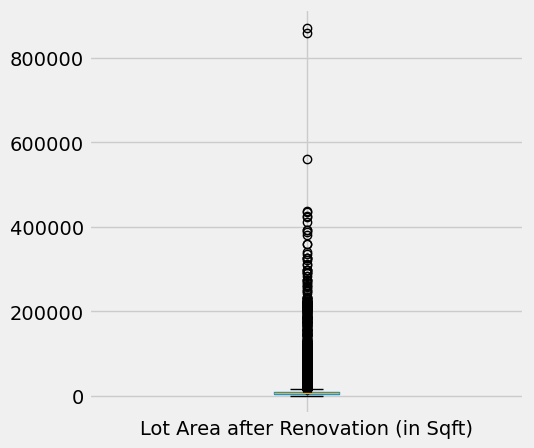

In [65]:
plt.style.use('default')
plt.style.use('fivethirtyeight')

for feature in continuous_features:
    plt.figure(figsize=(5,5))
    data.boxplot(column=feature)
    plt.show()




# Categorical Variables

In [66]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O' and feature not in year_features]
data[categorical_features]

,Waterfront View,No of Times Visited,Condition of the House
0,No,None,Fair
1,No,None,Fair
2,No,None,Fair
3,No,None,Excellent
4,No,None,Fair
...,...,...,...
21608,No,None,Fair
21609,No,None,Fair
21610,No,None,Fair
21611,No,None,Fair


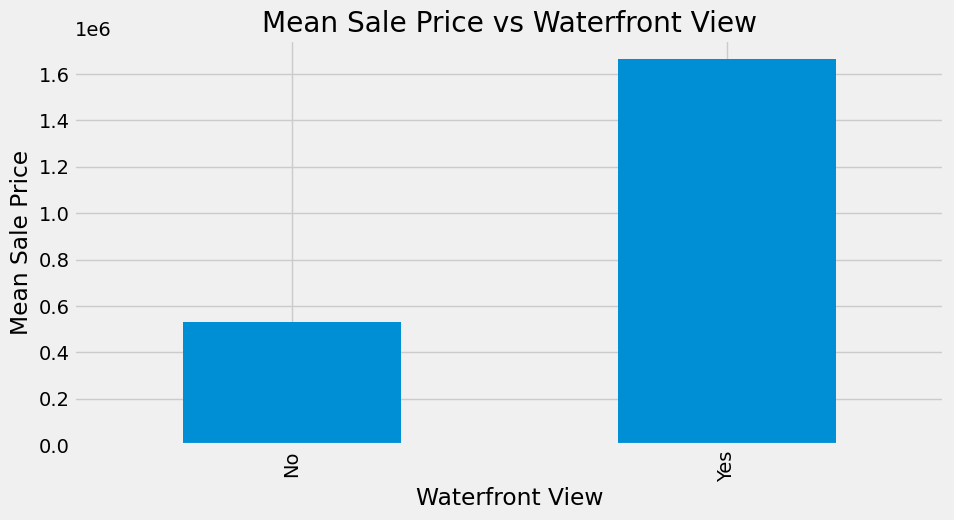

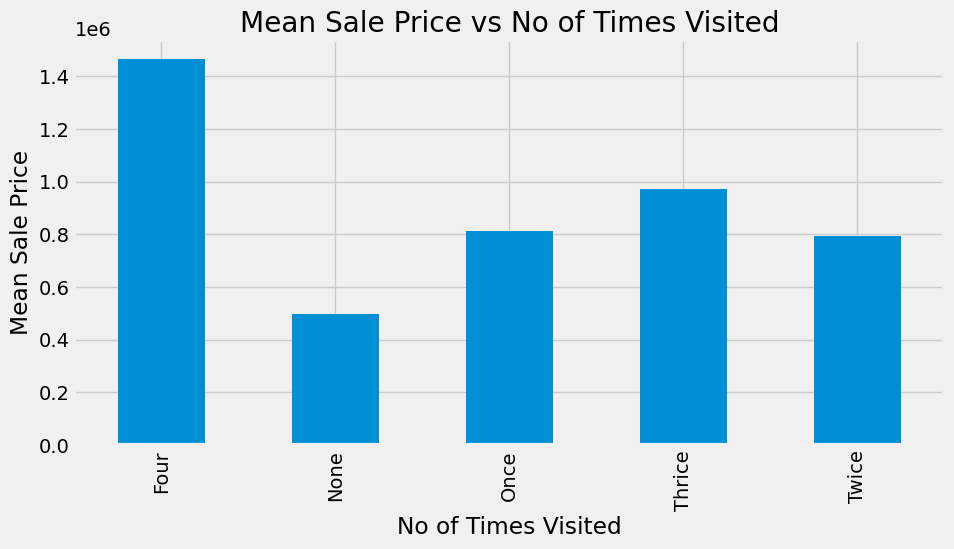

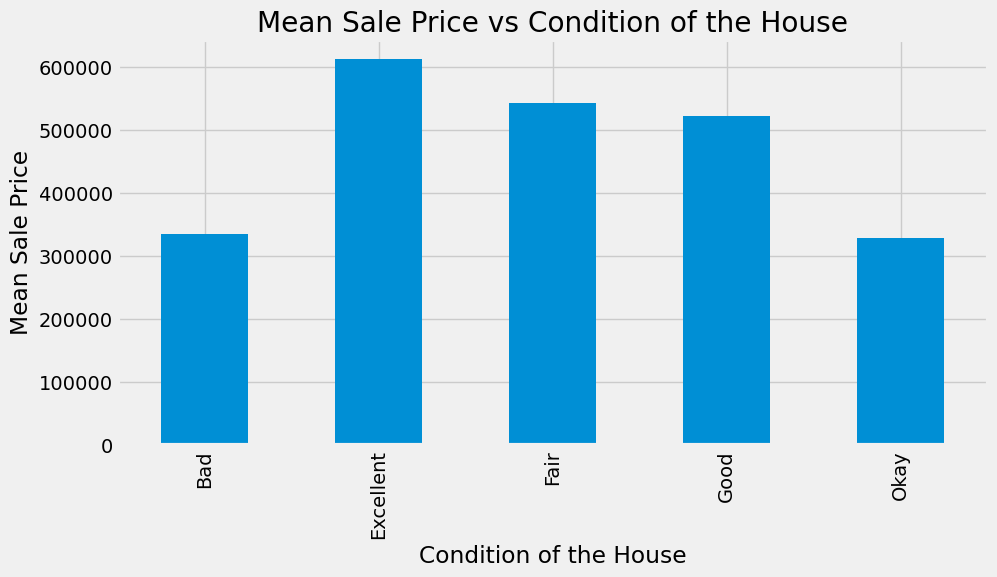

In [67]:
# Lets find relationship between selling price and Categorical features

plt.style.use('default')
plt.style.use('fivethirtyeight')

for feature in categorical_features:
    plt.figure(figsize=(10,5))
    data.groupby(feature)['Sale Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Mean Sale Price')
    plt.title(f"Mean Sale Price vs {feature}")
    plt.show()

# Note that this is just basic exploration of data. Some features like "zipcode" are identified as numeric variable but "zicode" is categorical in nature. We will clean this data in next stage.